In [1]:
import matplotlib.pyplot as plt
import numpy as np
from WooferConfig import WOOFER_CONFIG
import quaternion
%matplotlib notebook
plt.rcParams['figure.figsize'] = (14,8)

In [2]:
data = np.load('woofer_numpy_log.npz')
est = np.load('woofer_state_est_log.npz')['arr_0']

n = np.shape(est)[1]

n_data = np.shape(data['state_history'])[1]

(3, 2010)


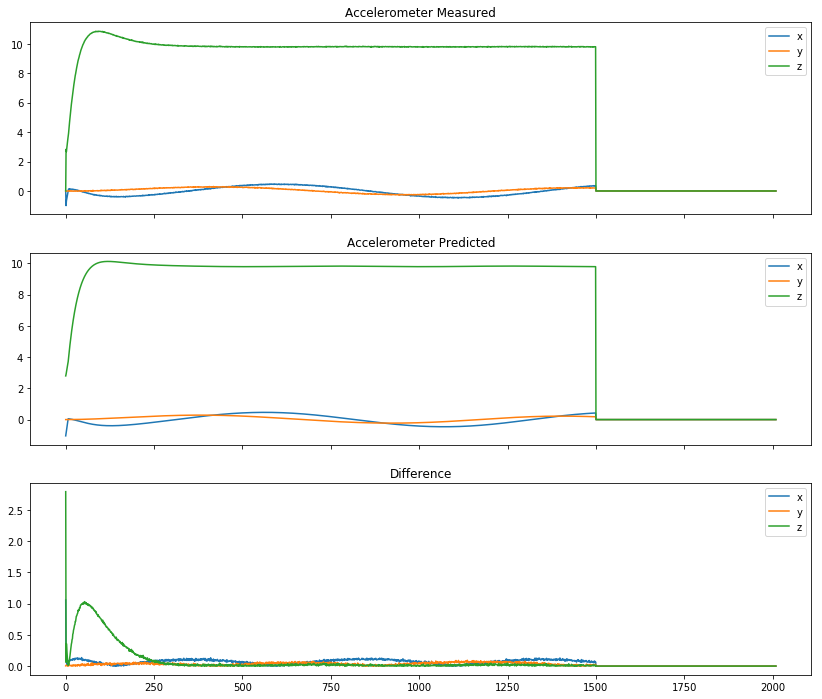

In [3]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
accel_meas = data['accelerometer_history'][0:3,:]
l1 = ax1.plot(accel_meas.T)
ax1.set_title('Accelerometer Measured')
ax1.legend(('x', 'y', 'z'))


accel_u_w = 1/7.166 * (data['force_history'][0:3, :n_data] + data['force_history'][3:6, :n_data] + data['force_history'][6:9, :n_data] + data['force_history'][9:12, :n_data])
accel_u_w_est = -1/WOOFER_CONFIG.MASS * (data['force_sensor_hist'][0:3, :n_data] + data['force_sensor_hist'][3:6, :n_data] + data['force_sensor_hist'][6:9, :n_data] + data['force_sensor_hist'][9:12, :n_data])
accel_u_b = np.zeros((3,n_data))
for i in range(n_data):
#     accel_u_b[:,i] = quaternion.vectorRotation(quaternion.inv(data['state_history'][3:7,i]), quaternion.fromVector(accel_u_w_est[:,i]))[1:4]
    accel_u_b[:,i] = quaternion.vectorRotation(quaternion.inv(data['state_history'][3:7,i]), quaternion.fromVector(accel_u_w[:,i]))[1:4]

print(np.shape(accel_u_b))    

accel_pred = accel_u_b[0:3,:]

l2 = ax2.plot(accel_pred.T)
ax2.set_title('Accelerometer Predicted')
ax2.legend(('x', 'y', 'z'))

p_diff = np.abs(accel_meas - accel_pred)
l3 = ax3.plot(p_diff.T)
ax3.set_title('Difference')
ax3.legend(('x', 'y', 'z'))



fig.set_size_inches(14,12)
plt.show()

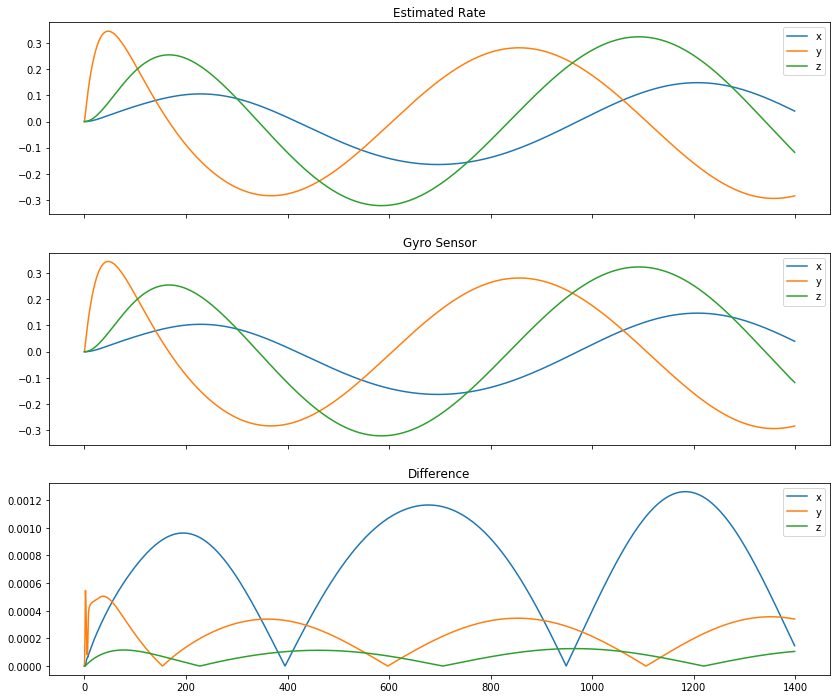

In [4]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
# x_true = data['state_history'][10:13,:n]
x_est = est[10:13,:]
# x_est = est[3:7,:]

l1 = ax1.plot(x_est.T)
ax1.set_title('Estimated Rate')
ax1.legend(('x', 'y', 'z'))


# x_sens = data['gyro_history'][0:3,:n]
x_sens = data['state_history'][10:13,:n]

l2 = ax2.plot(x_sens.T)
ax2.set_title('Gyro Sensor')
ax2.legend(('x', 'y', 'z'))


p_diff = np.abs(x_sens - x_est)
l3 = ax3.plot(p_diff.T)
ax3.set_title('Difference')
ax3.legend(('x', 'y', 'z'))


fig.set_size_inches(14,12)
plt.show()

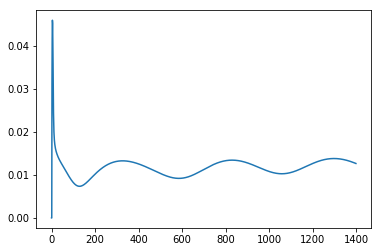

In [5]:
# find the quaternion error
phi = np.zeros(n)
for i in range(n):
    q_i_est = est[3:7,i]
    q_i_true = data['state_history'][3:7,i]
    
    q_d = quaternion.prod(quaternion.inv(q_i_est), q_i_true)
    phi_i = np.linalg.norm(quaternion.log(q_d))
    phi[i] = np.abs((phi_i + np.pi) % (2 * np.pi) - np.pi)
    
fig, ax = plt.subplots()

line1, = ax.plot(phi)

plt.show()
    

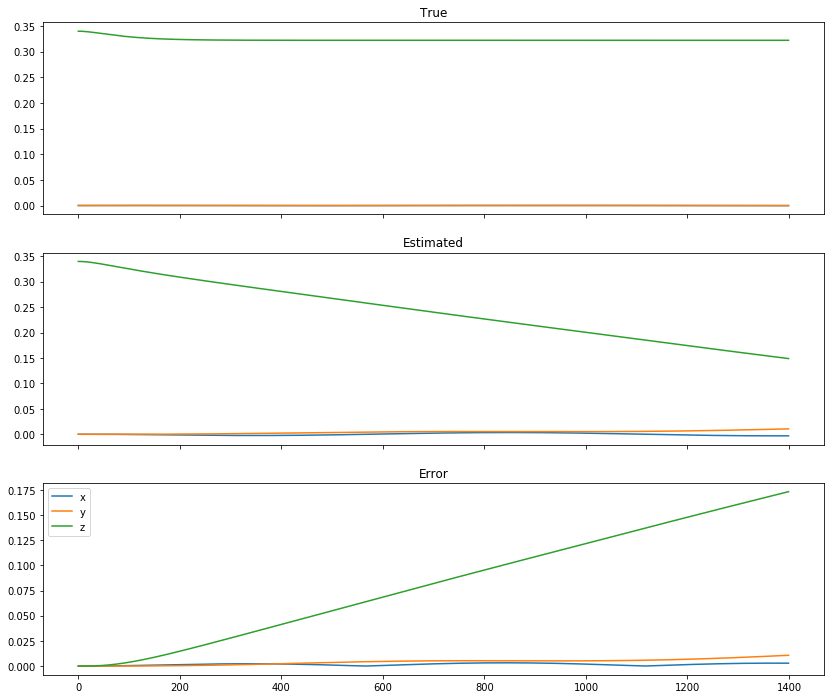

In [6]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
x_true = data['state_history'][0:3,:n]
l1 = ax1.plot(x_true.T)
ax1.set_title('True')

x_est = est[0:3,:]

l2 = ax2.plot(x_est.T)
ax2.set_title('Estimated')

p_diff = np.abs(x_est - x_true)
l3 = ax3.plot(p_diff.T)
ax3.set_title('Error')


fig.set_size_inches(14,12)
# plt.legend(('x','y','z','q0','q1','q2','q3','vx','vy', 'vz', 'wx_b', 'wy_b', 'wz_b'))
plt.legend(('x', 'y', 'z'))
plt.show()


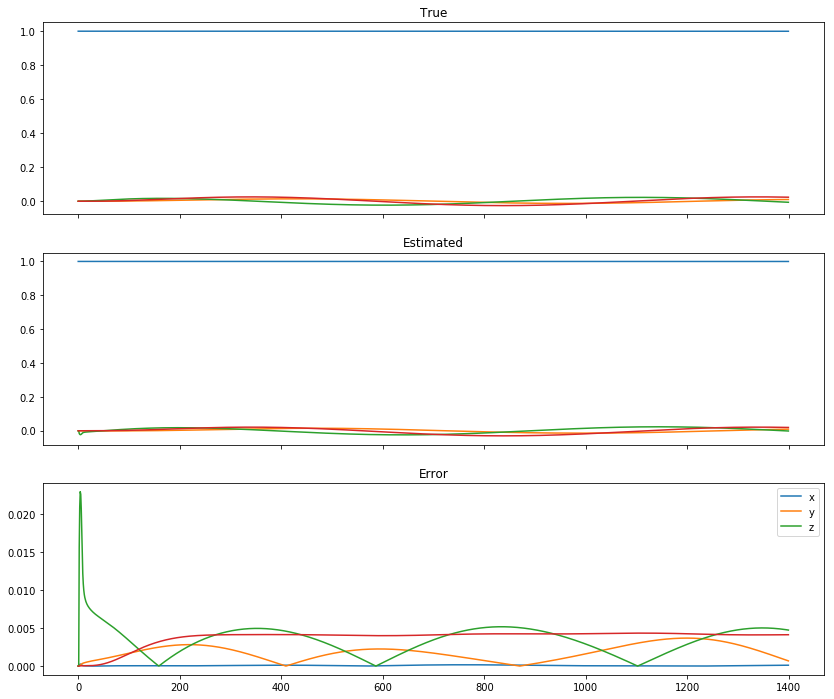

In [7]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
x_true = data['state_history'][3:7,:n]
l1 = ax1.plot(x_true.T)
ax1.set_title('True')

x_est = est[3:7,:]

l2 = ax2.plot(x_est.T)
ax2.set_title('Estimated')

p_diff = np.abs(x_est - x_true)
l3 = ax3.plot(p_diff.T)
ax3.set_title('Error')


fig.set_size_inches(14,12)
# plt.legend(('x','y','z','q0','q1','q2','q3','vx','vy', 'vz', 'wx_b', 'wy_b', 'wz_b'))
plt.legend(('x', 'y', 'z'))
plt.show()
